In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [2]:
iris = load_iris()

# Exploring Data

In [3]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Convert datatype to float
df = df.astype(float)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# append "target" and name it "label"
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df[10:100]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


# Preparing data for Keras and TensorFlow

In [7]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [8]:
# drop old label
df.drop(['label'], axis=1, inplace=True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [9]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [10]:
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [11]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Sequential model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential([
    Dense(5, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax'),
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Adding layer via add() method

model_seq = Sequential()
model_seq.add(Dense(5, activation='relu', input_shape=(4,)))
#model_seq.add(Dense(20, activation='relu'))
model_seq.add(Dense(10, activation='relu'))
model_seq.add(Dense(3, activation='softmax'))

model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_seq.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
history = model_seq.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Epoch 1/30
2/2 [==============================] - 0s 122ms/step - loss: 1.3726 - accuracy: 0.3146 - val_loss: 1.4801 - val_accuracy: 0.3043
Epoch 2/30
2/2 [==============================] - 0s 23ms/step - loss: 1.3468 - accuracy: 0.3146 - val_loss: 1.4504 - val_accuracy: 0.3043
Epoch 3/30
2/2 [==============================] - 0s 29ms/step - loss: 1.3213 - accuracy: 0.3146 - val_loss: 1.4224 - val_accuracy: 0.3043
Epoch 4/30
2/2 [==============================] - 0s 26ms/step - loss: 1.2992 - accuracy: 0.3146 - val_loss: 1.3949 - val_accuracy: 0.3043
Epoch 5/30
2/2 [==============================] - 0s 28ms/step - loss: 1.2754 - accuracy: 0.3258 - val_loss: 1.3693 - val_accuracy: 0.3043
Epoch 6/30
2/2 [==============================] - 0s 27ms/step - loss: 1.2533 - accuracy: 0.3258 - val_loss: 1.3446 - val_accuracy: 0.3043
Epoch 7/30
2/2 [==============================] - 0s 25ms/step - loss: 1.2326 - accuracy: 0.3820 - val_loss: 1.3204 - val_accuracy: 0.3478
Epoch 8/30
2/2 [==========

In [25]:
history.history

{'loss': [1.3725816011428833,
  1.3468046188354492,
  1.321333646774292,
  1.2992247343063354,
  1.2753617763519287,
  1.2532719373703003,
  1.2325536012649536,
  1.2124272584915161,
  1.1925925016403198,
  1.1737726926803589,
  1.15556001663208,
  1.1379799842834473,
  1.1216566562652588,
  1.1044957637786865,
  1.088549017906189,
  1.0726882219314575,
  1.057800054550171,
  1.0433130264282227,
  1.0299842357635498,
  1.0170097351074219,
  1.00462806224823,
  0.9923296570777893,
  0.9808205366134644,
  0.9701342582702637,
  0.9594625234603882,
  0.9492705464363098,
  0.9401807188987732,
  0.9304390549659729,
  0.9211612939834595,
  0.912315309047699],
 'accuracy': [0.31460675597190857,
  0.31460675597190857,
  0.31460675597190857,
  0.31460675597190857,
  0.3258427083492279,
  0.3258427083492279,
  0.3820224702358246,
  0.5056179761886597,
  0.550561785697937,
  0.6067415475845337,
  0.6516854166984558,
  0.6853932738304138,
  0.6853932738304138,
  0.6404494643211365,
  0.629213511943

In [26]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

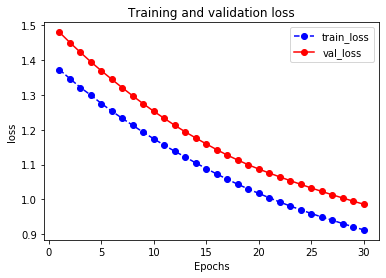

In [27]:
plot_metric(history, 'loss')

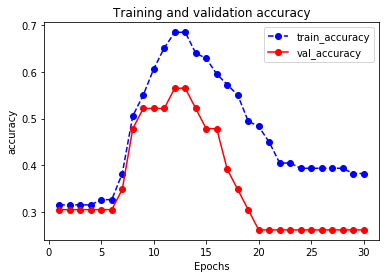

In [28]:
plot_metric(history, 'accuracy')

In [29]:
model_seq.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.9842 - accuracy: 0.2632


[0.9841926693916321, 0.2631579041481018]